In [1]:
import pandas  as pd
import   numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection   import train_test_split
import pickle
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
data=pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.shape

(614, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
categorical_columns= data.select_dtypes(include=['object']).columns

In [10]:
categorical_columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
continouns_columns= data.select_dtypes(include=['int64','float64']).columns

In [12]:
continouns_columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [13]:
for columns in categorical_columns:
    print(f'{columns}')
    print(data[columns].value_counts())
    print(f'null_count:{data[columns].isnull().sum()}')
    print('-----------------------')

Loan_ID
Loan_ID
LP002990    1
LP001002    1
LP001003    1
LP001005    1
LP001006    1
           ..
LP001024    1
LP001020    1
LP001018    1
LP001014    1
LP001013    1
Name: count, Length: 614, dtype: int64
null_count:0
-----------------------
Gender
Gender
Male      489
Female    112
Name: count, dtype: int64
null_count:13
-----------------------
Married
Married
Yes    398
No     213
Name: count, dtype: int64
null_count:3
-----------------------
Dependents
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
null_count:15
-----------------------
Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
null_count:0
-----------------------
Self_Employed
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
null_count:32
-----------------------
Property_Area
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
null_count:0
-----------------------
Loan_Status
Loan_Status
Y    422
N    192


In [14]:
for col in categorical_columns:
    print(f'Column: {col}')
    print("Value counts (%):")
    print((data[col].value_counts(normalize=True) * 100).round(2))
    print(f'Null count: {data[col].isnull().sum()} ({(data[col].isnull().mean()*100):.2f}%)')
    print('-----------------------')

Column: Loan_ID
Value counts (%):
Loan_ID
LP002990    0.16
LP001002    0.16
LP001003    0.16
LP001005    0.16
LP001006    0.16
            ... 
LP001024    0.16
LP001020    0.16
LP001018    0.16
LP001014    0.16
LP001013    0.16
Name: proportion, Length: 614, dtype: float64
Null count: 0 (0.00%)
-----------------------
Column: Gender
Value counts (%):
Gender
Male      81.36
Female    18.64
Name: proportion, dtype: float64
Null count: 13 (2.12%)
-----------------------
Column: Married
Value counts (%):
Married
Yes    65.14
No     34.86
Name: proportion, dtype: float64
Null count: 3 (0.49%)
-----------------------
Column: Dependents
Value counts (%):
Dependents
0     57.60
1     17.03
2     16.86
3+     8.51
Name: proportion, dtype: float64
Null count: 15 (2.44%)
-----------------------
Column: Education
Value counts (%):
Education
Graduate        78.18
Not Graduate    21.82
Name: proportion, dtype: float64
Null count: 0 (0.00%)
-----------------------
Column: Self_Employed
Value counts 

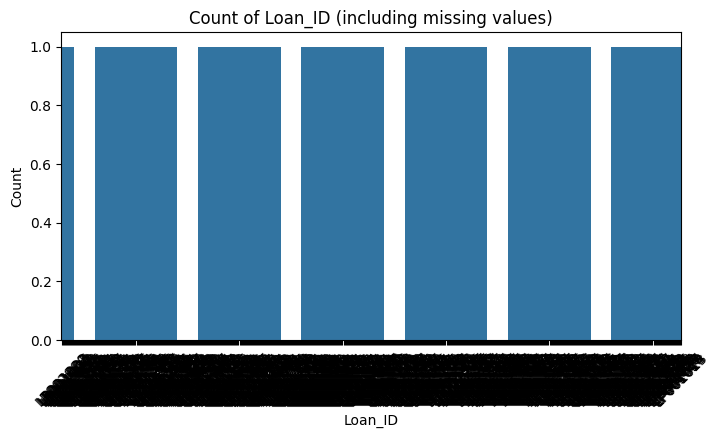

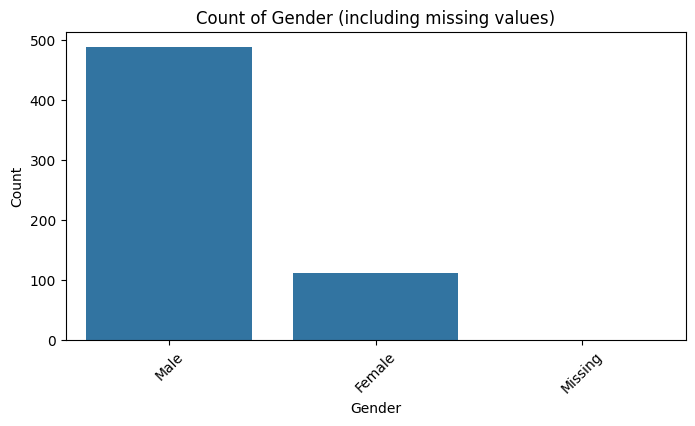

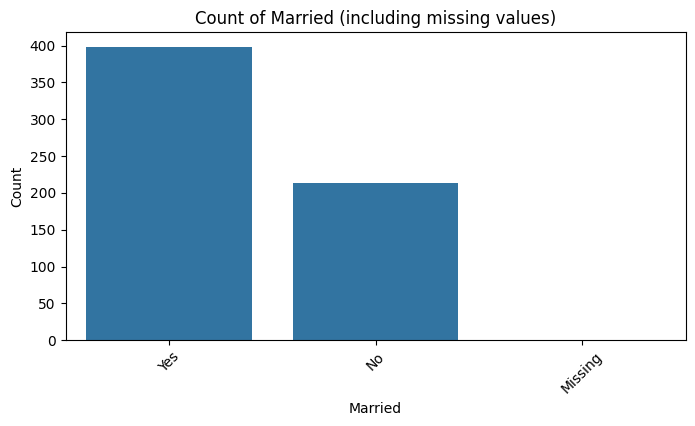

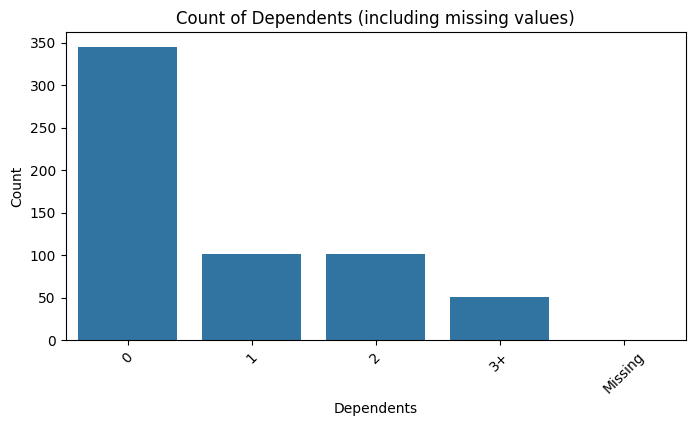

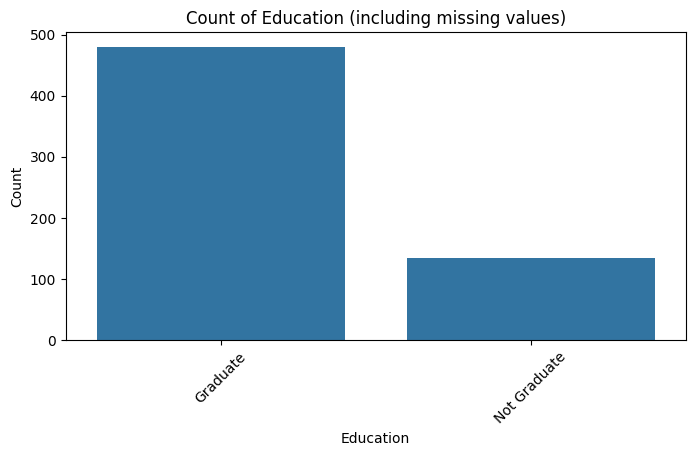

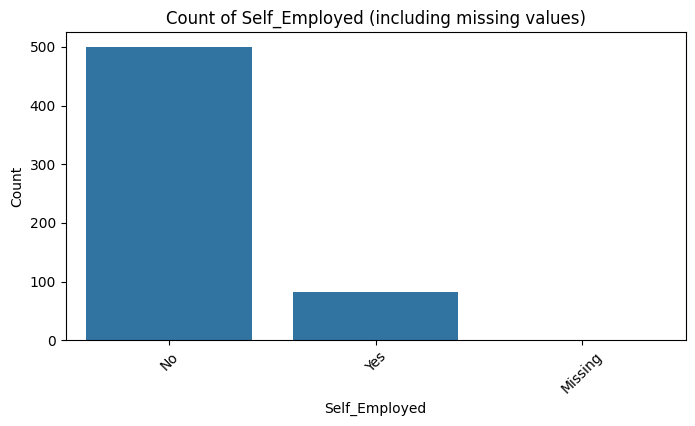

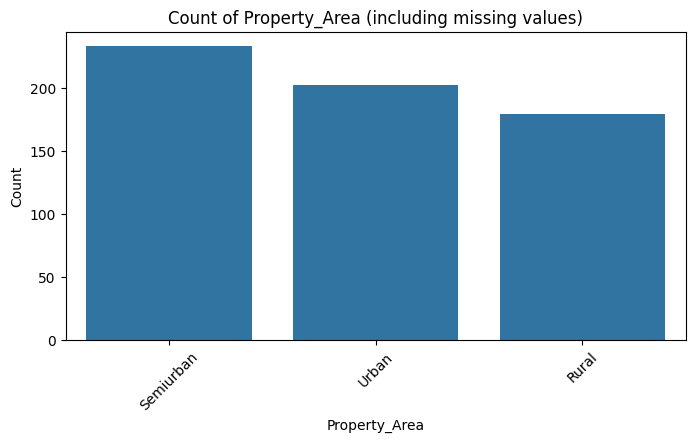

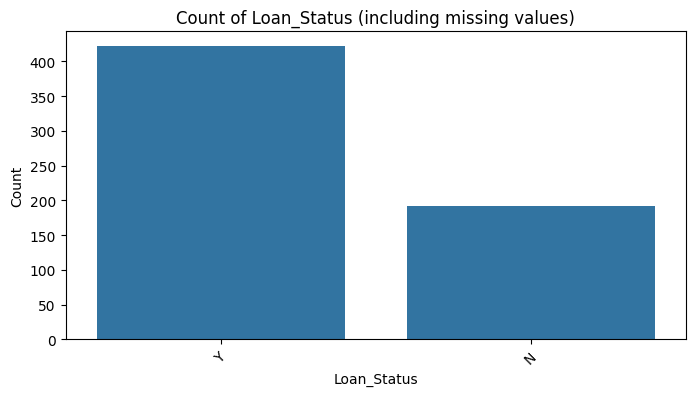

In [15]:
for col in categorical_columns:
    plt.figure(figsize=(8,4))
    
    # Temporarily fill NaNs with a label for plotting
    data_plot = data[col].fillna('Missing')
    
    sns.countplot(data=data, x=col, order=data_plot.value_counts().index)
    plt.title(f'Count of {col} (including missing values)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

<Figure size 800x500 with 0 Axes>

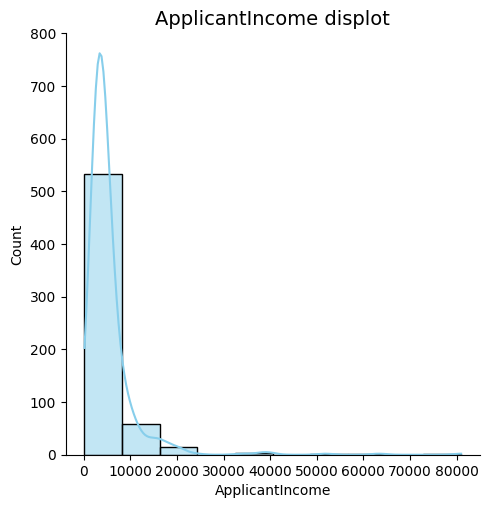

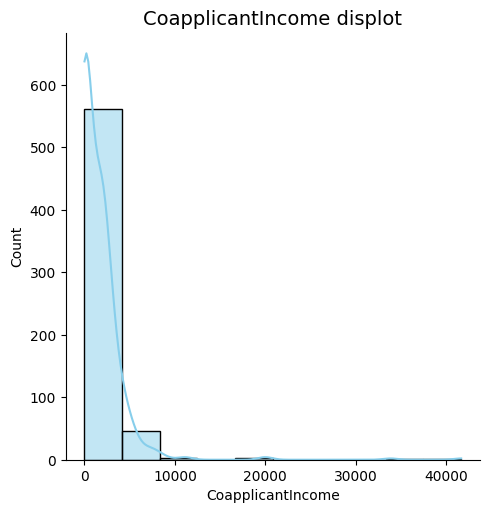

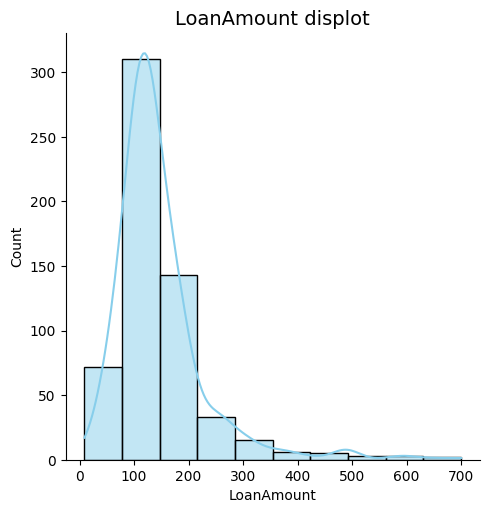

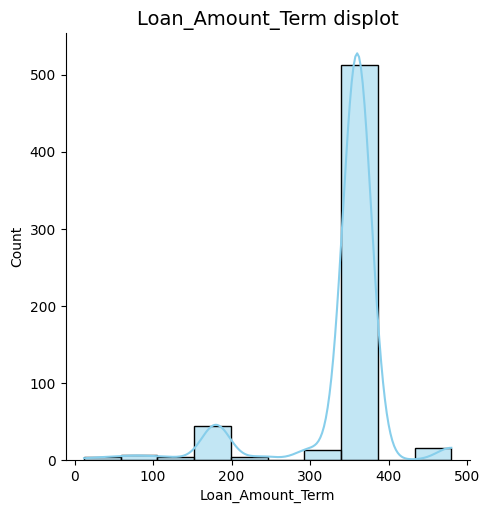

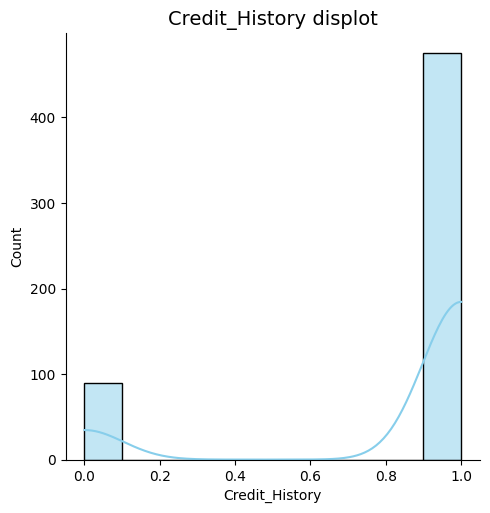

In [16]:
plt.figure(figsize=(8,5))
for features in continouns_columns:
    sns.displot(x=features, data=data,kde=True, bins=10, color='skyblue', edgecolor='black')
    plt.title(f"{features} displot", fontsize=14)
    plt.show()

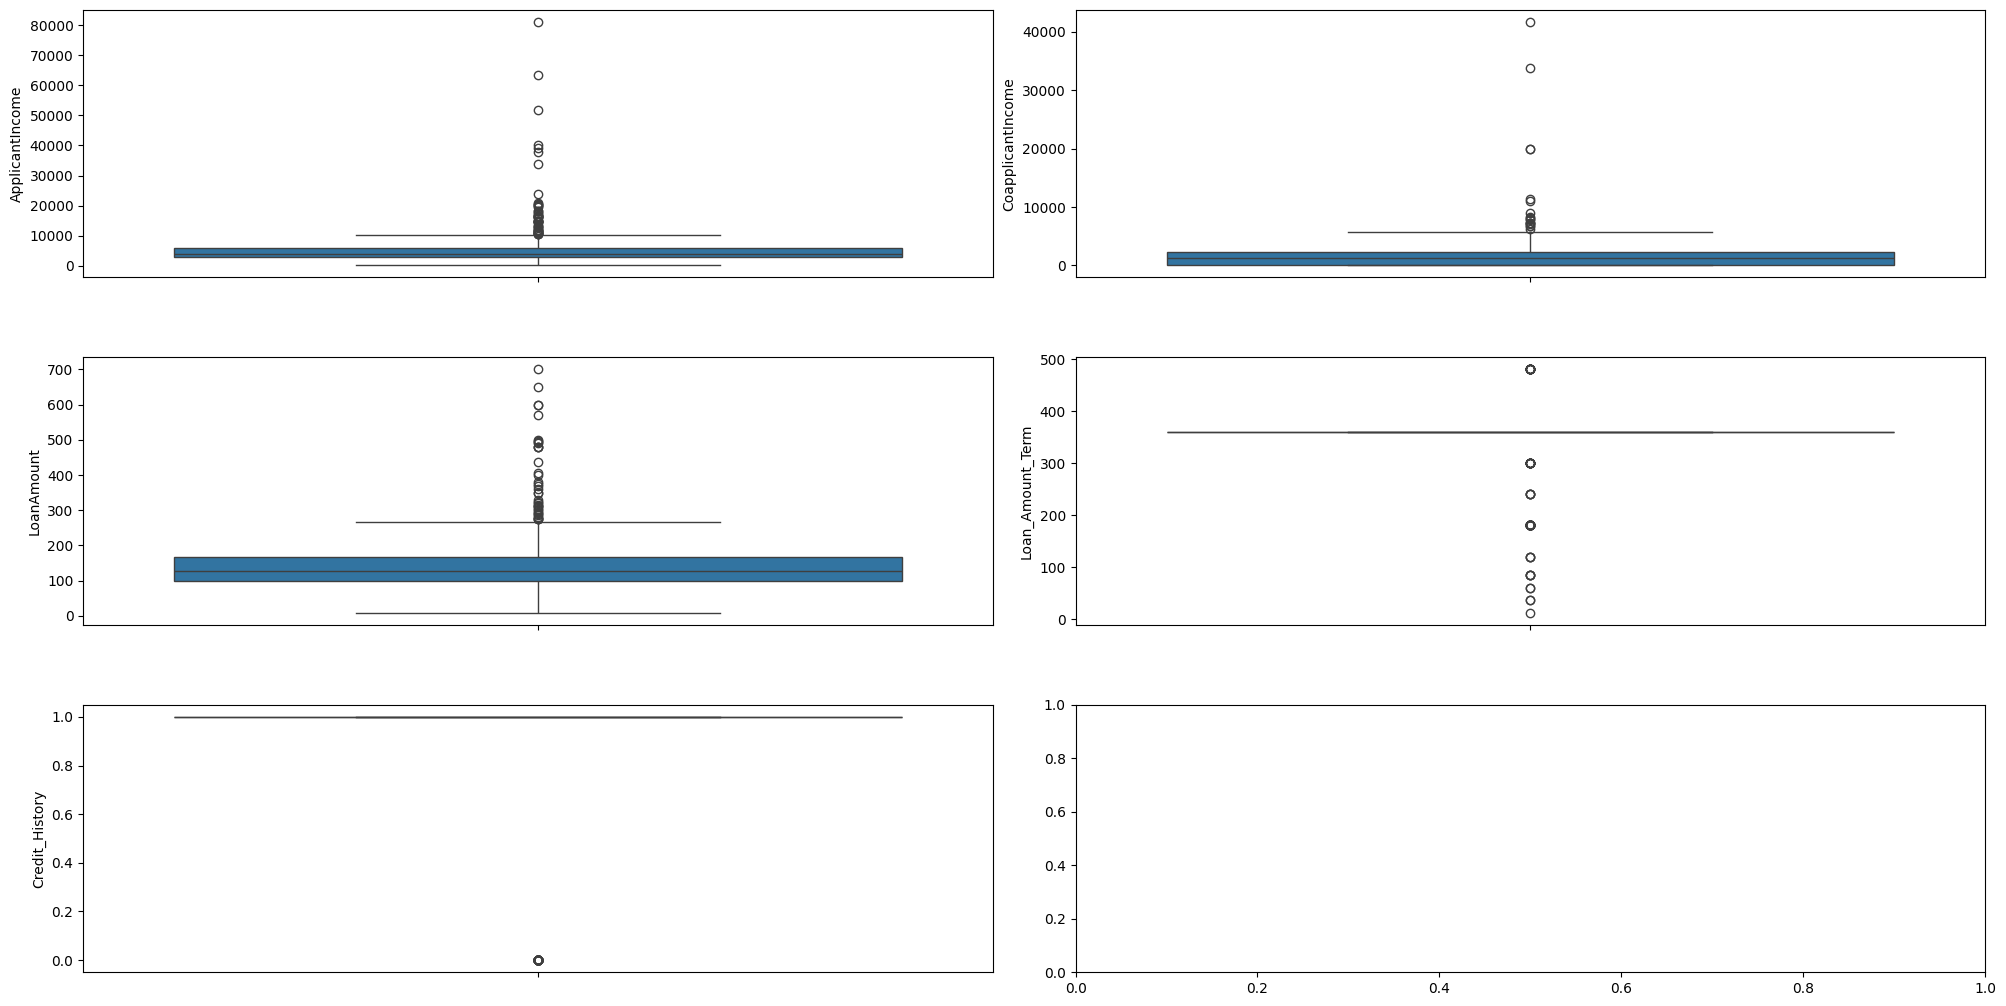

In [17]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in continouns_columns:
    if col != 'type':
        sns.boxplot(y=col, data=data, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [18]:
# plt.figure(figsize=(10,7))
# sns.heatmap(data.corr(), annot=True, cmap='inferno')

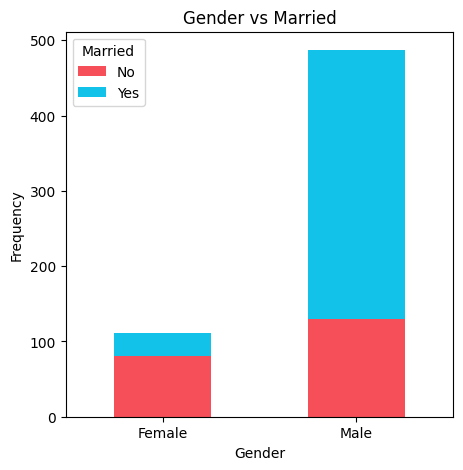

In [19]:
pd.crosstab(data.Gender,data.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

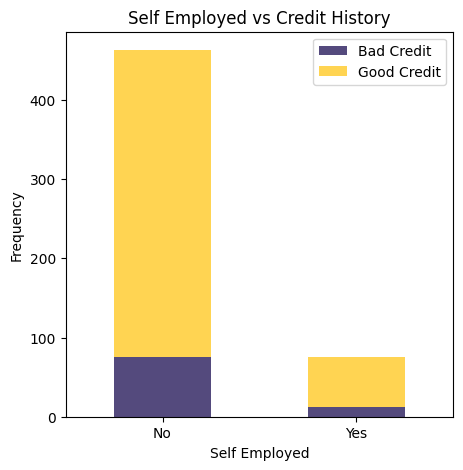

In [20]:
pd.crosstab(data.Self_Employed,data.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

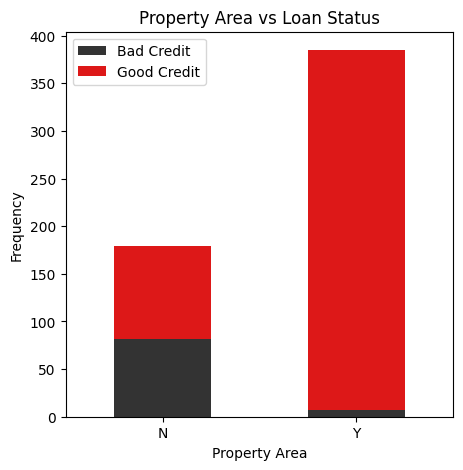

In [21]:
pd.crosstab(data.Loan_Status,data.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

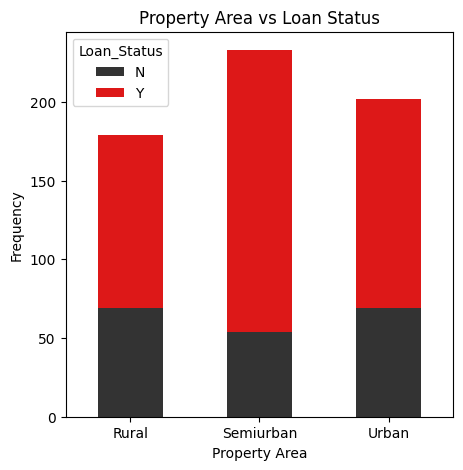

In [22]:
pd.crosstab(data.Property_Area,data.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

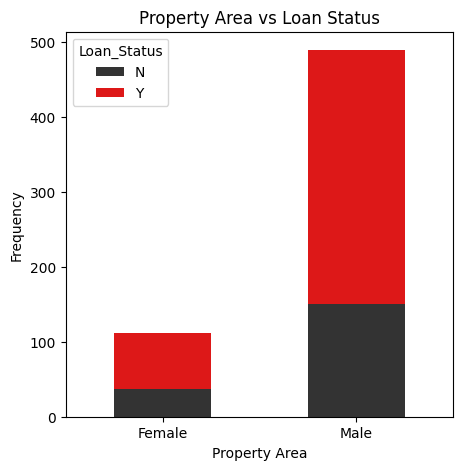

In [23]:
pd.crosstab(data.Gender,data.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

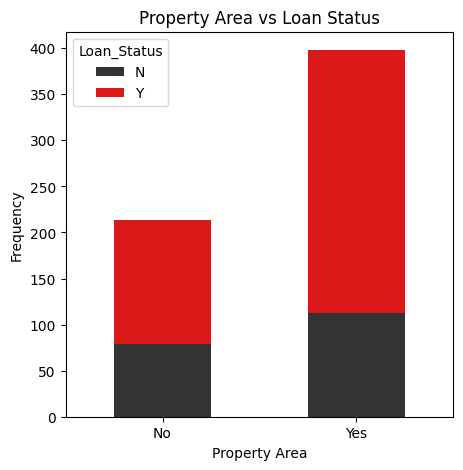

In [24]:
pd.crosstab(data.Married,data.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

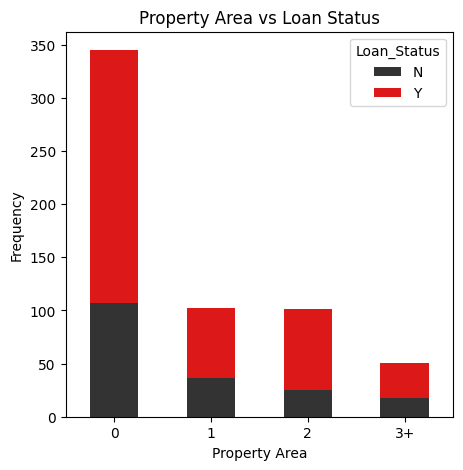

In [25]:
pd.crosstab(data.Dependents,data.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

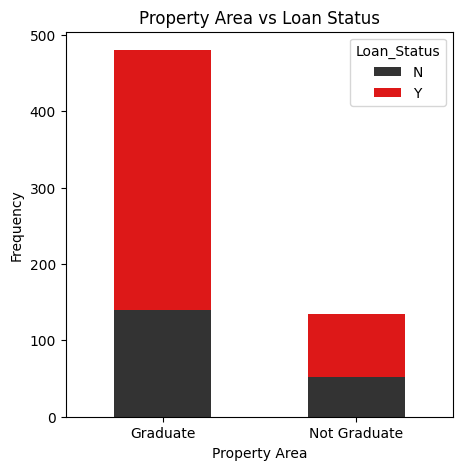

In [26]:
pd.crosstab(data.Education,data.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

C:\Users\MY PC\AppData\Local\Temp\ipykernel_15596\3298156567.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=data, palette="mako");


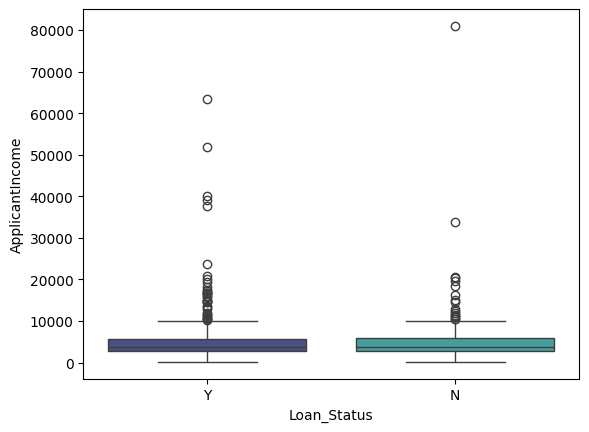

In [27]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=data, palette="mako");

C:\Users\MY PC\AppData\Local\Temp\ipykernel_15596\4206693390.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Loan_Status",y="CoapplicantIncome",data=data, palette="rocket");


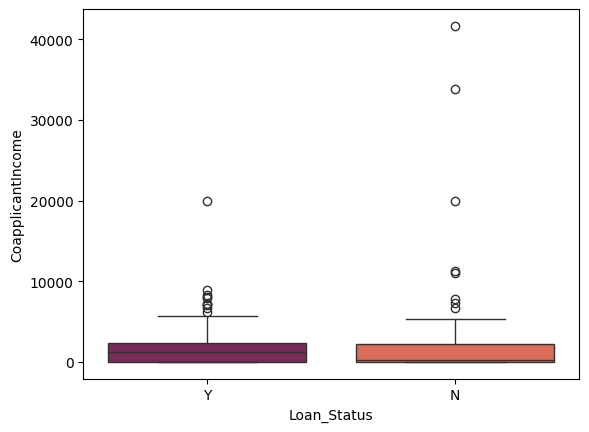

In [28]:
sns.boxplot(x="Loan_Status",y="CoapplicantIncome",data=data, palette="rocket");

In [29]:
data = data.drop(['Loan_ID'], axis = 1)

In [30]:
categorical_columns= data.select_dtypes(include=['object']).columns 

In [31]:
for features in categorical_columns:
    data[features] = data[features].fillna(data[features].mode()[0])

In [32]:
continouns_columns= data.select_dtypes(include=['int64','float64']).columns

In [33]:
continouns_columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [34]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [35]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Credit_History'].mode()[0])

In [36]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [37]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [38]:
categorical_columns = list(categorical_columns) + ["Loan_Amount_Term", "Credit_History"]

In [39]:
categorical_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Loan_Amount_Term',
 'Credit_History']

In [40]:
continouns_columns= [col for col in continouns_columns if col not in ["Loan_Amount_Term", "Credit_History"]]

In [41]:
data=pd.get_dummies(data=data,columns=categorical_columns,drop_first=True,dtype=int)

In [42]:
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Loan_Amount_Term_12.0,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Credit_History_1.0
0,5849,0.0,146.412162,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1
1,4583,1508.0,128.000000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,3000,0.0,66.000000,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1
3,2583,2358.0,120.000000,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1
4,6000,0.0,141.000000,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
610,4106,0.0,40.000000,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
611,8072,240.0,253.000000,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1
612,7583,0.0,187.000000,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1


In [43]:
data.shape

(614, 24)

In [44]:
continouns_columns

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [45]:
for feature in  continouns_columns:
    if (data[feature] > 0).all():  # check positivity for log
        data.loc[:, feature] = np.log1p(data[feature].astype(float))

C:\Users\MY PC\AppData\Local\Temp\ipykernel_15596\3490602274.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 8.67419694  8.43032726  8.00670085  7.85709386  8.6996814   8.59748202
  7.75533881  8.01862547  8.29579811  9.46047633  8.07121854  7.82444593
  8.03073492  7.52510075  7.17011954  8.50734486  8.18785544  8.16365618
  8.4945385   7.86365127  8.9438978   8.69215439  7.86365127  8.12148037
  8.22094117  9.1654476   7.9373747   8.3492478   7.27447956  8.22977775
  8.33495163  8.06085575  8.45382732  8.16080392  9.43356392  7.7301748
  7.51152465  8.20740183  8.33495163  8.22924442  8.18896686  7.49609735
  7.7836406   8.27944349  8.45446636  8.13476078  8.63941082  8.66939912
  7.88080434  8.29429961  7.56475701  8.03495502  8.35019365  8.43750042
  9.35018927  7.90433484  7.66528472  8.12177742  8.99727091  8.11910084
  7.82444593  8.0163179   7.8671055   8.50633445  8.33495163  8.65294711
  8.07121854 

In [46]:
data.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Gender_Male',
       'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y',
       'Loan_Amount_Term_12.0', 'Loan_Amount_Term_36.0',
       'Loan_Amount_Term_60.0', 'Loan_Amount_Term_84.0',
       'Loan_Amount_Term_120.0', 'Loan_Amount_Term_180.0',
       'Loan_Amount_Term_240.0', 'Loan_Amount_Term_300.0',
       'Loan_Amount_Term_360.0', 'Loan_Amount_Term_480.0',
       'Credit_History_1.0'],
      dtype='object')

In [47]:
X = data.drop(["Loan_Status_Y"], axis=1)
y = data["Loan_Status_Y"]

In [48]:
y.value_counts()

Loan_Status_Y
1    422
0    192
Name: count, dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [50]:
# Assuming continouns_columns is a list of numeric columns
Q1 = X_train[continouns_columns].quantile(0.25)
Q3 = X_train[continouns_columns].quantile(0.75)
IQR = Q3 - Q1

# Create mask for non-outliers
mask = ~((X_train[continouns_columns] < (Q1 - 1.5 * IQR)) | 
         (X_train[continouns_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply mask to X_train and y_train
X_train_clean = X_train[mask]
y_train_clean = y_train[mask]

In [51]:
from imblearn.over_sampling import SMOTE
X_train,y_train = SMOTE().fit_resample(X_train_clean,y_train_clean)

C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [54]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

# Feature Scaling for models sensitive to magnitude
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models and GridSearchCV parameters
models = {
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000, random_state=42),
        "params": {
            "penalty": ["l1", "l2", "elasticnet", "none"],
            "C": [0.01, 0.1, 1, 10, 100],
            "solver": ["liblinear", "saga"],
            "class_weight": [{0: 1, 1: 1}, {0: 2, 1: 1}, {0: 3, 1: 1}]
            # compatible solvers
        }
    },
    "DecisionTree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "criterion": ["gini", "entropy"],
            "max_depth": [None, 5, 10, 20, 7, 8, 15],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 5],
            "max_features": [None, "sqrt", "log2"]
        }
    },
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200, 500],
            "criterion": ["gini", "entropy"],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 5],
            "max_features": ["auto", "sqrt", "log2"]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": list(range(1, 21)),
            "weights": ["uniform", "distance"],
            "metric": ["euclidean", "manhattan", "minkowski"]
        }
    },
    "XGBoost": {
    "model": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42,
                           scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1])),
    "params": {
        "n_estimators": [100, 200, 500],
        "max_depth": [3, 5, 7, 10],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.7, 0.8, 1.0],
        "colsample_bytree": [0.7, 0.8, 1.0]
    }
}
}
best_models = {}

# GridSearchCV loop
for name, mp in models.items():
    print(f"Training {name}...")
    
    # Scale features only for models that require it
    if name in ["LogisticRegression", "KNN", "XGBoost"]:
        X_train_model, X_test_model = X_train_scaled, X_test_scaled
    else:
        X_train_model, X_test_model = X_train, X_test
    
    grid = GridSearchCV(mp["model"], mp["params"], cv=5, scoring="f1", n_jobs=-1)
    grid.fit(X_train_model, y_train)
    
    best_models[name] = grid.best_estimator_
    
    y_pred = grid.predict(X_test_model)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"{name} Best Params: {grid.best_params_}")
    print(f"{name} Accuracy: {acc:.4f}, F1 Score: {f1:.4f}, ROC-AUC: {roc:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

print("All classification models trained and evaluated successfully!")



Training LogisticRegression...


C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
300 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fi

LogisticRegression Best Params: {'C': 0.01, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression Accuracy: 0.8486, F1 Score: 0.8993, ROC-AUC: 0.7680
Confusion Matrix:
[[ 32  26]
 [  2 125]]

Training DecisionTree...
DecisionTree Best Params: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
DecisionTree Accuracy: 0.8270, F1 Score: 0.8832, ROC-AUC: 0.7522
Confusion Matrix:
[[ 32  26]
 [  6 121]]

Training RandomForest...


C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
810 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
486 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parame

RandomForest Best Params: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
RandomForest Accuracy: 0.8054, F1 Score: 0.8583, ROC-AUC: 0.7740
Confusion Matrix:
[[ 40  18]
 [ 18 109]]

Training KNN...
KNN Best Params: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}
KNN Accuracy: 0.7351, F1 Score: 0.8108, ROC-AUC: 0.6806
Confusion Matrix:
[[ 31  27]
 [ 22 105]]

Training XGBoost...
XGBoost Best Params: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
XGBoost Accuracy: 0.7676, F1 Score: 0.8245, ROC-AUC: 0.7511
Confusion Matrix:
[[ 41  17]
 [ 26 101]]

All classification models trained and evaluated successfully!


C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\xgboost\core.py:158: UserWarning: [19:33:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [55]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, precision_score, recall_score, classification_report

# Evaluate only using the best models (already trained)
for name, model in best_models.items():
    # Select the appropriate test set
    if name in ["LogisticRegression", "KNN", "XGBoost"]:
        X_test_model = X_test_scaled
    else:
        X_test_model = X_test
    
    y_pred = model.predict(X_test_model)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"{name} Evaluation on Test Set:")
    print(f"Accuracy: {acc:.4f}, F1 Score: {f1:.4f}, ROC-AUC: {roc:.4f}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{report}\n")


LogisticRegression Evaluation on Test Set:
Accuracy: 0.8486, F1 Score: 0.8993, ROC-AUC: 0.7680
Precision: 0.8278, Recall: 0.9843
Confusion Matrix:
[[ 32  26]
 [  2 125]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.55      0.70        58
           1       0.83      0.98      0.90       127

    accuracy                           0.85       185
   macro avg       0.88      0.77      0.80       185
weighted avg       0.86      0.85      0.84       185


DecisionTree Evaluation on Test Set:
Accuracy: 0.8270, F1 Score: 0.8832, ROC-AUC: 0.7522
Precision: 0.8231, Recall: 0.9528
Confusion Matrix:
[[ 32  26]
 [  6 121]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.55      0.67        58
           1       0.82      0.95      0.88       127

    accuracy                           0.83       185
   macro avg       0.83      0.75      0.77       185
weighted avg       0